In [2]:
import numpy as np
import pandas as pd

In [5]:
#Import Train and Test Data 
source  = '/Users/Administrator/Desktop/' 
datafile = pd.read_csv(source + 'Bitcoind.csv')
#columns = ['Basic_Size','Gr','Target_Pull_Size']
bitcoindf = pd.DataFrame(datafile)
bitcoindf.tail(50)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 11, 2021",56.850,55.850,57.11,54.35,128.09,1.79
1,"Mar 10, 2021",56.060,54.880,564.61,53.07,112.81,2.15
2,"Mar 09, 2021",53.690,52.350,54.08,51.94,103.83,2.64
3,"Mar 08, 2021",52.310,50.990,52.38,49.34,68.14,2.61
4,"Mar 07, 2021",50.980,48.900,51.43,48.89,82.91,4.35
5,"Mar 06, 2021",39.260,38.300,40.94,38.28,156.02,2.50
6,"Mar 05, 2021",38.850,39.230,39.69,37.38,125.37,-1.03
7,"Mar 04, 2021",46.400,38.850,46.60,38.06,248.47,19.41
8,"Mar 03, 2021",46.510,46.400,48.14,45.10,193.87,0.24
9,"Mar 02, 2021",44.836,46.510,47.30,43.80,151.83,-3.60


In [6]:
#import modules
from datetime import date
#convert column "date" into datetime format
bitcoindf['Date'] = pd.to_datetime(bitcoindf['Date'])


In [7]:
bitcoindf=bitcoindf.set_index('Date')
bitcoindf.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-03-11,56.85,55.85,57.11,54.35,128.09,1.79
2021-03-10,56.06,54.88,564.61,53.07,112.81,2.15
2021-03-09,53.69,52.35,54.08,51.94,103.83,2.64
2021-03-08,52.31,50.99,52.38,49.34,68.14,2.61
2021-03-07,50.98,48.90,51.43,48.89,82.91,4.35


<AxesSubplot:xlabel='Date'>

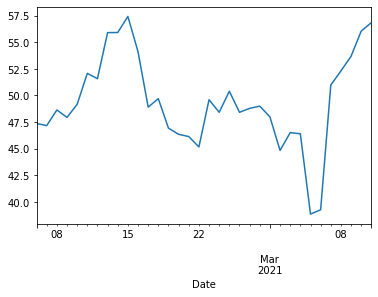

In [9]:
#x and y axes input data
y = bitcoindf['Price']
y.plot()

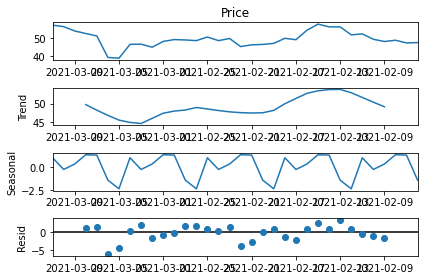

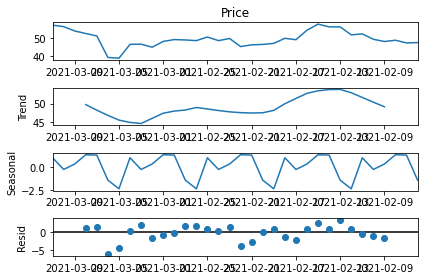

In [10]:
# Plot the original data, the trend, the seasonality, and the residuals 

from statsmodels.tsa.seasonal import seasonal_decompose
data=seasonal_decompose(y,model='additive')
data.plot()

Testing data for stationarity

In [11]:
from statsmodels.tsa.stattools import kpss
kpss(y,nlags='legacy')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


(0.14929337877800952,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Needs to make data stationary with log

In [12]:
y_log=np.log(y)

<AxesSubplot:xlabel='Date'>

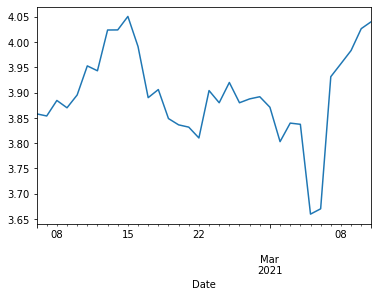

In [13]:
y_log.plot()

In [14]:
kpss(y_log.diff().dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


(0.2000137635215055,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [15]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split=int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [16]:
 #Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [17]:
# Now, we choose a couple of values to try for each parameter: p_values, d_values and q_values
# Fill in the blanks as appropriate
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

Finally, we can find the optimum ARIMA model for our data.

In [18]:


import warnings
warnings.filterwarnings("ignore")
evaluate_models(y_log, p_values, d_values, q_values)

Best ARIMANone MSE=inf


# ARIMA Model

In [22]:
from statsmodels.tsa.arima.model import ARIMA
  
p=2
d=0
q=0
model = ARIMA(y_log, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)

Testing for Model Fit

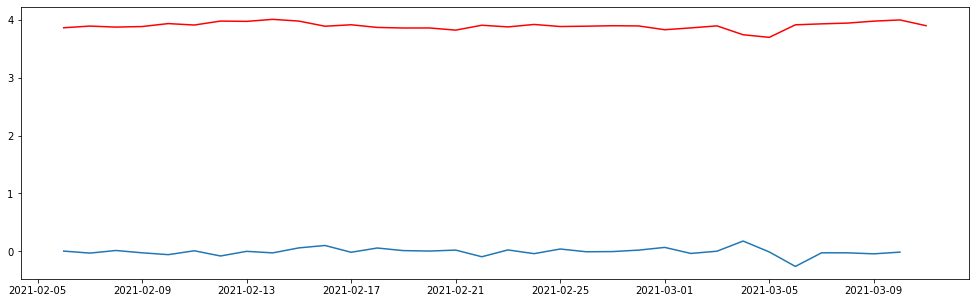

In [23]:
import matplotlib as plt

from matplotlib import *
import sys
import pylab as pl
pl.figure(figsize =(17,5))
pl.plot(y_log.diff())
pl.plot(model_fit.predict(),color='red')

Model is not fit good because there is big difference and forecasting not going to be precise

# Forecasting

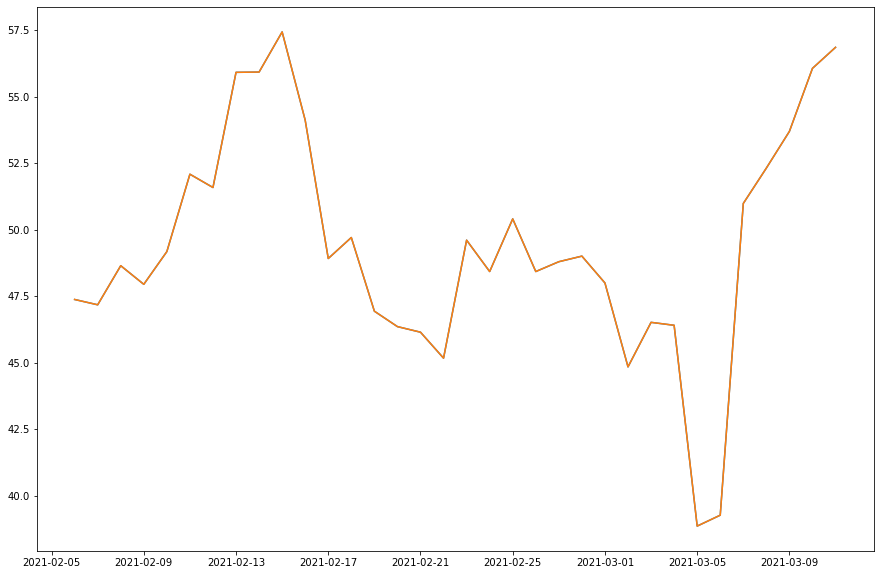

In [28]:
import matplotlib.pyplot as plt
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period = 24
date_range = pd.date_range(y.index[-1], periods = forecast_period, 
              freq='MS').strftime("%Y-%m-%d").tolist()

# Convert that range into a dataframe that includes your predictions

future_months = pd.DataFrame(date_range, columns = ['Month'])
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)
future_months['Prediction'] = forecast
# Plot your future predictions
plt.figure(figsize=(15,10))
plt.plot(y)
plt.plot(np.exp(y_log.append(future_months['Prediction'])))
plt.show()
yforcast = np.exp(y_log.append(future_months['Prediction']))


In [30]:
y_hats  = pd.DataFrame({'Price' : yforcast})
y_hats 


,Price
2021-03-11,56.850
2021-03-10,56.060
2021-03-09,53.690
2021-03-08,52.310
2021-03-07,50.980
2021-03-06,39.260
2021-03-05,38.850
2021-03-04,46.400
2021-03-03,46.510
2021-03-02,44.836


ARIMA Model is not the best to forecast Bitcoin but there better models for this job , Facebook Prophet would work the best here.